In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.fftpack import fft, fftfreq

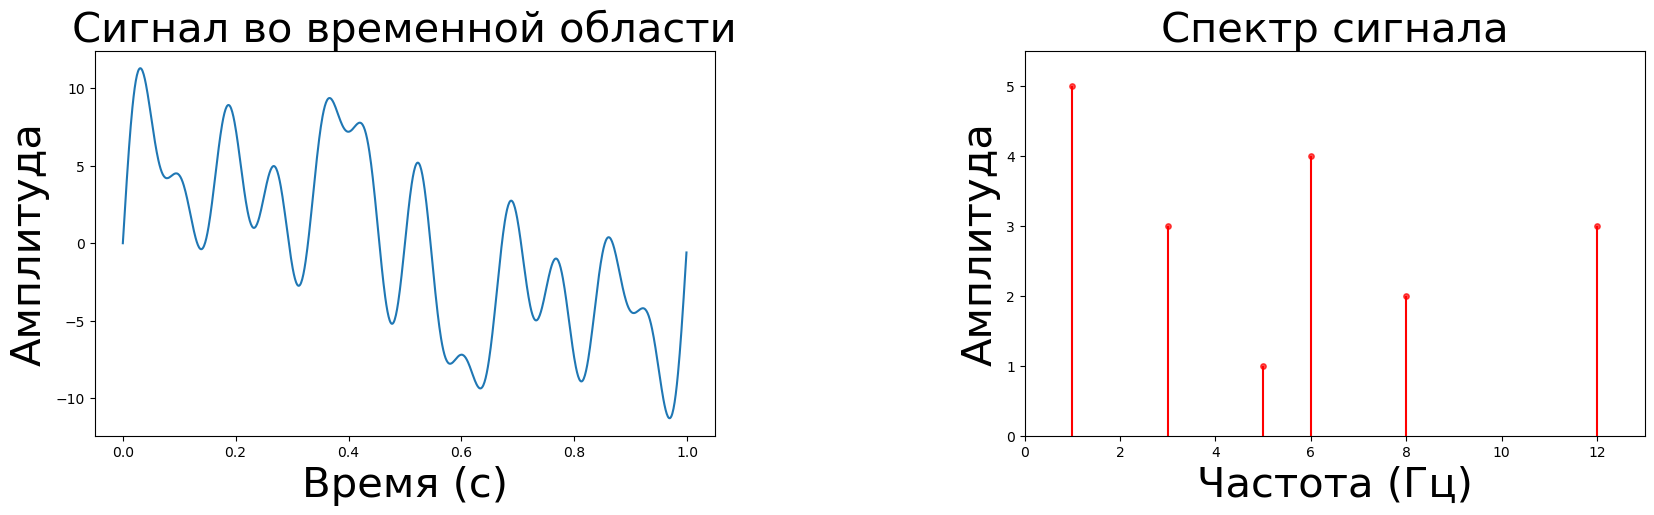

In [122]:
# Генерируем синусоидальный сигнал
sampling_rate = 1000  # Частота дискретизации
time = np.arange(0, 1, 1/sampling_rate)
frequency = [1, 3, 5, 6, 8, 12]  # Частоты сигнала
amplitude = [5, 3, 1, 4, 2, 3]  # Амплитуды составляющих
signal = 0
for i, f in enumerate(frequency):
    signal += amplitude[i] * np.sin(2 * np.pi * f * time)

# Вычисляем преобразование Фурье
fft = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/sampling_rate)

# Визуализация
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(time, signal)
plt.title('Сигнал во временной области', fontsize=30)
plt.xlabel('Время (с)', fontsize=30)
plt.ylabel('Амплитуда', fontsize=30)

plt.subplot(1, 2, 2)
plt.vlines(x=frequencies, ymin=0, ymax=(np.abs(fft)* 2)/sampling_rate, colors='red')
for i, f in enumerate(frequencies):
    if (np.abs(fft[i])* 2)/sampling_rate > 0.5:
        plt.scatter(x=f, y=(np.abs(fft[i])* 2)/sampling_rate, s=15, color='red', alpha=0.7)
plt.title('Спектр сигнала', fontsize=30)
plt.xlabel('Частота (Гц)', fontsize=30)
plt.ylabel('Амплитуда', fontsize=30)
plt.xlim([0, np.max(frequency)+1])
plt.ylim([0, 1.1 * np.max((np.abs(fft)* 2)/sampling_rate)])
plt.subplots_adjust(wspace=.5)
# plt.tight_layout()
# plt.savefig('fourie.png')
plt.show()

In [65]:
frequencies[(np.abs(fft) > 10) & (frequencies > 0) ]

array([ 1.,  3.,  5.,  6.,  8., 12.])